In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

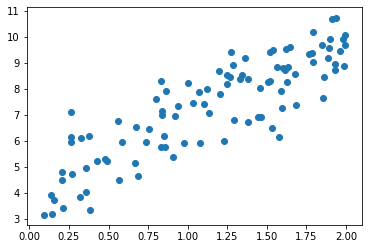

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y)

## OLS Estimate
Note : X is with bias term
$$ \hat \theta = (X^T X)^{-1} X^T y $$

In [3]:
# Preparing for getting OLS Estimate
X_bias = np.c_[np.ones(shape = (X.shape[0],1)), X]  # Adding Bias to X
theta = np.linalg.inv(X_bias.T@X_bias)@X_bias.T@y
print(*theta)

[4.06227828] [2.8327939]


Ideally we would except 4, 3 as theta, but noise made it difficult to get the exact values.

# Sklearn Approach

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_bias, y)
print(*model.intercept_, *model.coef_)

4.062278279367705 [0.        2.8327939]


In [5]:
# Calculating through Moore-Penrose Inverse (pseudoinverse). Adv of this approach over above equation,1. Efficient, 2. handles singular Xs (which cant be invertible; when rows < features) 
# Computes through SVD
np.linalg.pinv(X_bias).dot(y)

array([[4.06227828],
       [2.8327939 ]])

### Pitfalls with closed form equation approach
Computational Complexity:
$(X^T X)^{-1}$ has Computational Complexity of $O(m^{2.4})$ to $O(m^3)$. It increases with increase in number of features.
For ex: if you double the number of features, the time increases by $2^{2.4}$ to  $2^{3}$

SVD has Complexity of $O(m^2)$

Enter Gradient Descent : Suited to large number of features or many instances of data

# Gradient Descent

1. Involves using whole bunch of training date to perform one update of parameters.     
2. AKA Full batch GD or Batch GD.       
3. As there are no Inverse calculations, much faster than SVD decomposition or Normal equation calculation (closed form) esp in large feature problems).        
4. GD suffers from local minima. It happens if cost function is irregular or non-convex. LR cost function is convex (impyling no local minima). But in-case of other generic problems it can be problematic.        
5. The contour can be big dimensional (if more features) and it searches for bottom of plateau where for the combination of all features, the cost is lowest.                 
5. Always perform feature scaling, ensuring faster convergence. (remember the cost function contour against two features in diff scales)

$$ \theta = \theta + \alpha*grad $$
where $$ grad = \frac {\partial loss}{\partial \theta} = \frac{2}{n} * (y - \theta^T * X)*X $$ 
remember X is with bias term.
* Conceptually dividing by number of examples makes little difference, since it’s equivalent to rescaling the learning rate

In [6]:
alpha = 0.05
iterations = 1000
n = 100

theta = np.zeros(shape = (X_bias.shape[1], 1))
for iteration in range(iterations):
    grad = 2/n*X_bias.T@(y - X_bias@theta)
    theta = theta + alpha*grad
theta

array([[4.06227598],
       [2.83279565]])

# Stochastic Gradient Descent

1. In Stochastic Gradient Descent, we update the values for each row, and we can choose do this for entire data over multiple iterations. One full set of data into theta update in multiple iterations.       
2. We can choose to send random data into updation provided if sequence of data is not important.           
2. Beware of the n value in gradient update, it is 1 as we send only one data.          
3. SGD is better at finding global maxima, because the updates of theta will be irregular or stochastic in nature. So it has good chance of jumping out of local minima compared to batch-GD. In batch GD, the updates of theta are much smoother towards the optima.         
4. For the same reason, at the end of iterations, the parameters may not be optimal but close to optimal.                   
4. This can be partially solved through learning rate scheduler (reducing learning rate over iterations or closer to optima).           



In [7]:
n_epochs = 500
# t0, t1 = 5, 50 # learning schedule hyperparameters
# def learning_schedule(t):
#     return t0/(t + t1)
alpha = 0.05
iterations = len(y)
n = 1 #(Note n = 1, because we are sending one row at a time & updating features)
theta = np.zeros(shape = (X_bias.shape[1], 1))

for epoch in range(500):
    for iteration in range(iterations):
        grad = (2/n*X_bias[iteration]*(y[iteration] - X_bias[iteration]@theta).reshape(-1,1)).reshape(-1,1)
        # alpha = learning_schedule(epoch*n + iteration)
        theta = theta + alpha*grad
theta

array([[3.75791563],
       [2.47929205]])

# Mini-Batch Gradient Descent

 1. Instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called mini-batches.     2. Main Adv : optimized performance considering hardware capability.        
 3. Less erratic than SGD but not smoother than BGD.        
 4.  BGD takes a lot of time to take each step, and Stochastic GD and Mini-batch GD would also reach the minimum if you used a good learning schedule.          

In [8]:
n_epochs = 500
alpha = 0.05
iterations = len(y)
batch_size = int(round(iterations/4, 0))
n = batch_size 
theta = np.zeros(shape = (X_bias.shape[1], 1))

for epoch in range(500):
    for iteration in np.arange(0, iterations , batch_size):
        grad = 2/n*X_bias[iteration : iteration+batch_size].T@(y[iteration : iteration+batch_size] - X_bias[iteration : iteration+batch_size]@theta)
        theta = theta + alpha*grad

theta

array([[4.05115725],
       [2.82555243]])

| Algorithm | Large-N | Large-M | Hyper-Params | Scaling |  
| --- | --- | --- | --- | --- |
| Normal Eq (Closed Form) | Fast | Slow | 0 | No |
| SVD | Fast | Slow | 0 | No |
| Batch GD | Slow | Fast | 2 | Yes |
| SGD | Fast | Fast | >= 2 | Yes |
| Mini-Batch GD | Fast | Fast | >= 2 | Yes |

The hyperparameters are : number of iterations, learning rate, learning rate scheduling parameters.